# IA Project: Supervised Learning on Autism Dataset

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("./dataset_pro.csv")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,no
1,1,1,0,0,0,1,1,0,0,0,36,4,m,white european,yes,no,family member,yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,hispanic,no,no,family member,yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,white european,no,yes,family member,yes


In [ ]:
# Count entries for each value in each column
print(data['Age_Mons'].value_counts())
print(data['Qchat-10-Score'].value_counts())
print(data['Sex'].value_counts())
print(data['Ethnicity'].value_counts())
print(data['Jaundice'].value_counts())
print(data['Family_mem_with_ASD'].value_counts())
print(data['Who completed the test'].value_counts())
print(data['Class/ASD Traits'].value_counts())


Age_Mons
36    320
24     70
30     67
12     67
28     42
26     36
33     36
34     34
15     31
31     30
35     30
32     30
23     28
22     27
25     26
29     24
27     23
19     21
20     21
14     19
13     18
18     16
21     13
16     13
17     12
Name: count, dtype: int64
Qchat-10-Score
7     135
5     120
4     110
8      97
3      96
6      96
9      95
2      88
1      88
10     75
0      54
Name: count, dtype: int64
Sex
m    735
f    319
Name: count, dtype: int64
Ethnicity
white european    334
asian             299
middle eastern    188
south asian        60
black              53
hispanic           40
others             35
latino             26
mixed               8
pacifica            8
native indian       3
Name: count, dtype: int64
Jaundice
no     766
yes    288
Name: count, dtype: int64
Family_mem_with_ASD
no     884
yes    170
Name: count, dtype: int64
Who completed the test
family member               1018
health care professional      29
self                    

In [ ]:
# Class Distribution
print(data.groupby("Sex").size())

Sex
f    319
m    735
dtype: int64


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

data['Sex']= label_encoder.fit_transform(data['Sex'])
data['Ethnicity']= label_encoder.fit_transform(data['Ethnicity'])
data['Jaundice']= label_encoder.fit_transform(data['Jaundice'])
data['Family_mem_with_ASD']= label_encoder.fit_transform(data['Family_mem_with_ASD'])
data['Who completed the test']= label_encoder.fit_transform(data['Who completed the test'])
data['Class/ASD Traits']= label_encoder.fit_transform(data['Class/ASD Traits'])


data['Sex'].unique()
data['Ethnicity'].unique()
data['Jaundice'].unique()
data['Family_mem_with_ASD'].unique()
data['Who completed the test'].unique()
data['Class/ASD Traits'].unique()

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np

df = pd.read_csv('dataset_pro.csv')

X = df.drop(['Class/ASD Traits'], axis=1)
y = df['Class/ASD Traits']

np.unique(y, return_counts=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, y_train = SMOTE(random_state = 42).fit_resample(X_train, y_train)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)
print("Training set dimensions:", X_train.shape, y_train.shape)
print("Test set dimensions:", X_test.shape, y_test.shape)
print("Training set classes distribution:", y_train.value_counts(normalize=True))
print("Test set classes distribution:", y_test.value_counts(normalize=True))

Training set dimensions: (843, 17) (843,)
Test set dimensions: (211, 17) (211,)
Training set classes distribution: Class/ASD Traits
yes    0.695136
no     0.304864
Name: proportion, dtype: float64
Test set classes distribution: Class/ASD Traits
yes    0.672986
no     0.327014
Name: proportion, dtype: float64


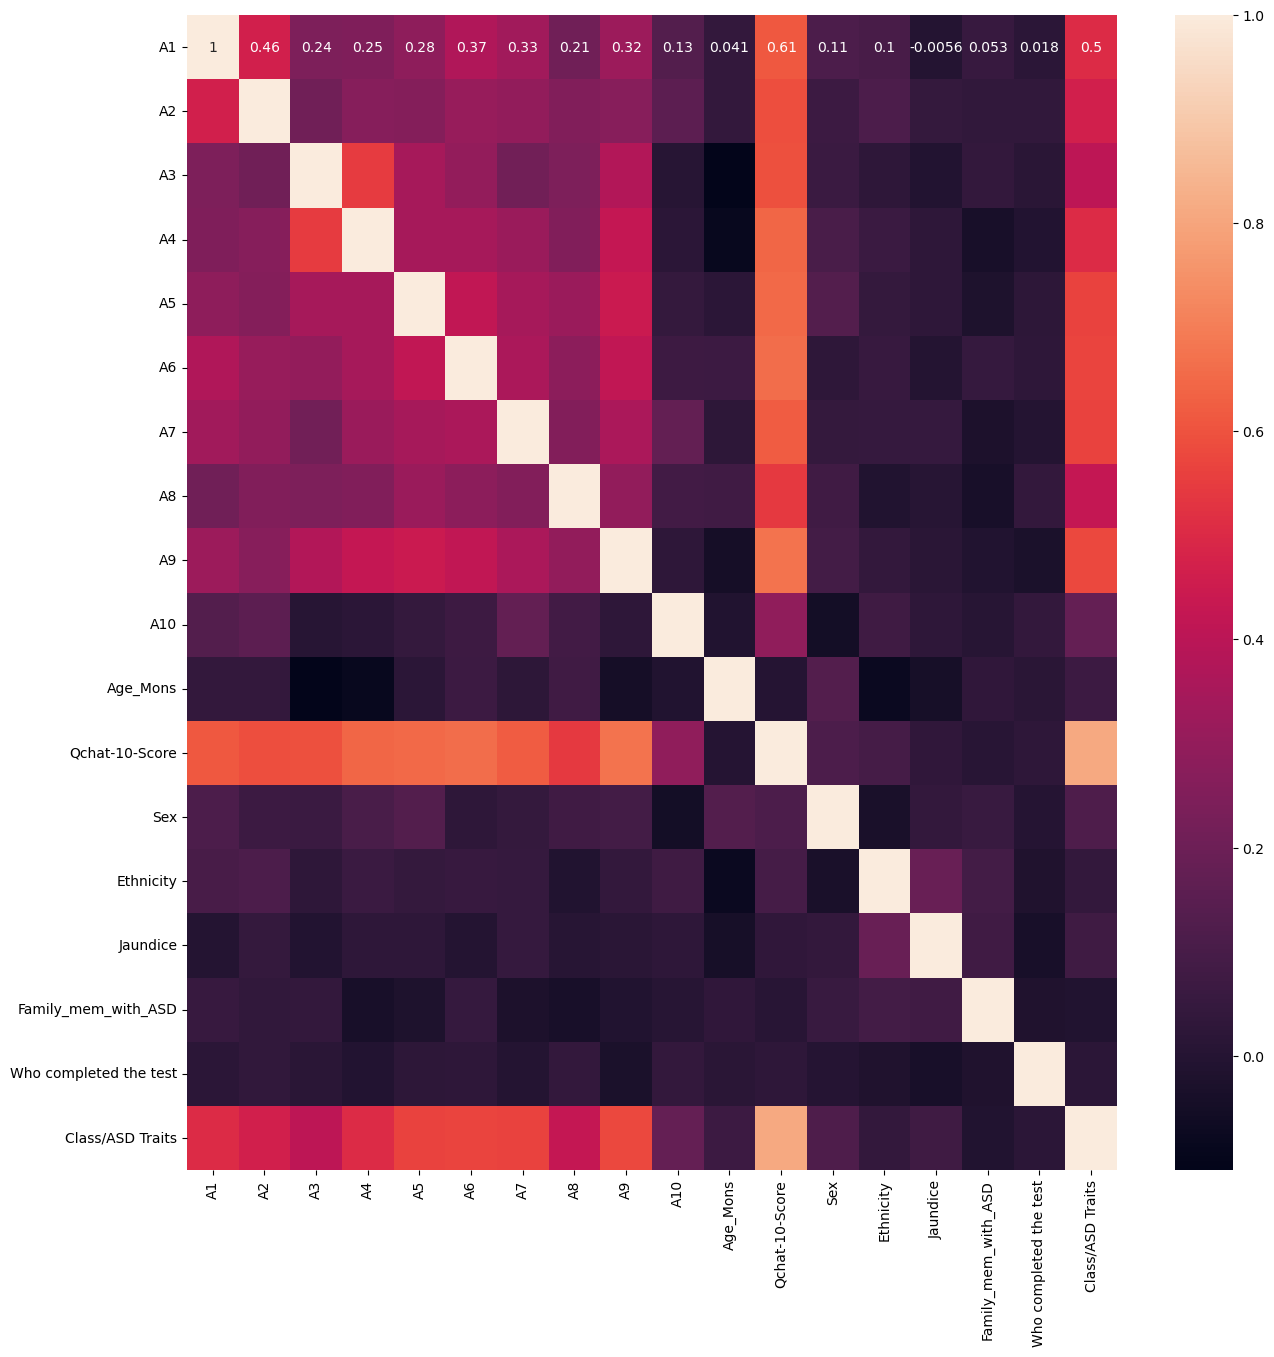

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00        51
         yes       1.00      1.00      1.00       144

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Score: 1.0


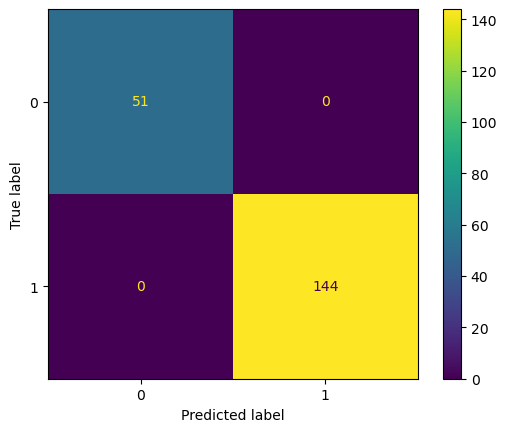

In [19]:
import pandas as pd
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

df = pd.read_csv('./dataset_pro.csv')

df = df.drop_duplicates()

X = df.drop('Class/ASD Traits', axis=1)
y = df['Class/ASD Traits']

# Convert categorical data to numeric using one-hot encoding
X = pd.get_dummies(X)

# Ensure the target variable is numeric
if y.dtype == 'Class/ASD Traits':
    y, _ = pd.factorize(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit DecisionTreeClassifier with restricted depth
dt = DecisionTreeClassifier(random_state=42, max_depth=3)  # Limiting depth to prevent overfitting
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)

print(f'Accuracy: {accuracy_dt}')
print('Classification Report:')
print(report)


# Perform cross-validation
scores = cross_val_score(dt, X, y, cv=5)
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Score: {scores.mean()}')

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


Accuracy: 1.0
              precision    recall  f1-score   support

          no       1.00      1.00      1.00        51
         yes       1.00      1.00      1.00       144

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



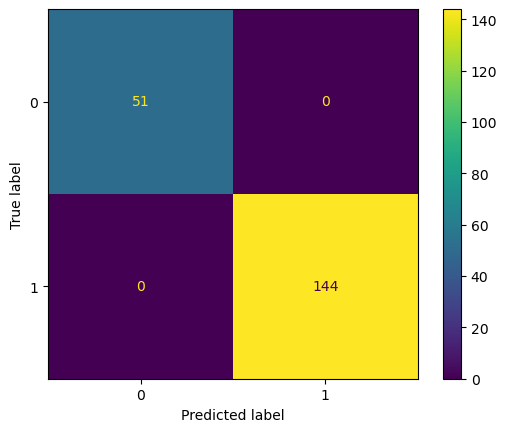

In [23]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_csv('./dataset_pro.csv')

df = df.drop_duplicates()

X = df.drop('Class/ASD Traits', axis=1)
y = df['Class/ASD Traits']

# Convert categorical data to numeric using one-hot encoding
X = pd.get_dummies(X)

# Ensure the target variable is numeric
if y.dtype == 'Class/ASD Traits':
    y, _ = pd.factorize(y)
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a SVM Classifier
clf = SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_svm = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svm))

# Model Precision and Recall
print(classification_report(y_test, y_pred_svm))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_svm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

              precision    recall  f1-score   support

          no       0.93      0.97      0.95        69
         yes       0.99      0.96      0.98       142

    accuracy                           0.97       211
   macro avg       0.96      0.97      0.96       211
weighted avg       0.97      0.97      0.97       211



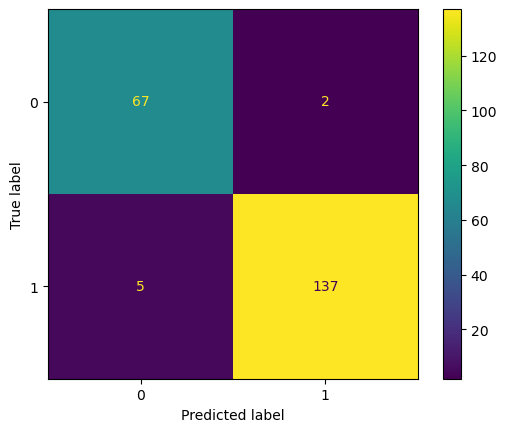

In [24]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('dataset_pro.csv')

# Prepare the features and target variable
X = df.drop('Class/ASD Traits', axis=1)
y = df['Class/ASD Traits']

X = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train, y_train)

# Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

# Model Precision and Recall
print(classification_report(y_test, y_pred_knn))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()